# Notebook 14 Removing Interface Points that are located on fault traces

[GemGIS](https://github.com/cgre-aachen/gemgis) is a package for geographic information processing for geomodeling. In particular, data is prepared for direct use in [GemPy](https://github.com/cgre-aachen/gempy) via a GemPy Data Class. The package provides functioans to process spatial data such as vector data (shape files, geojson files, geopackages), raster data (tiff-files), data retrieved from online services (WMS, WCS, WFS) or KML/XML files. 

At a later stage, functionality will be added to interactively add interfaces and orientations for a model, choosing the extent, defining custom sections and more. In addition, functionality will be provided to export data from GemPy into Geoinformation Systems (=GIS) such as QGIS or ArcGIS and Google Earth. 

# Overview

This notebook will present how vertices of LineStrings stored as GeoDataFrames can be removed if they share the same points with the trace of a fault. The LineStrings in questions usually represent layer boundaries on geological maps. If vertices of these boundaries are sharing the same coordinates as the fault vertices, the interpolation in `GemPy`or a subsequent uncertainty analysis may not work properly. 

- [What is GemPy?](#gempy)
- [What are Interfaces and Orientations?](#intandor)
- [Downloading and Installing GemGIS](#gemgis)
- [Structure of GemGIS](#structure)
- [Importing Libraries](#import)
- [Version Reports](#vreport)
- [Removing interface points located on a fault](#removinginterfacepoints)



<a id='gempy'></a>
## What is GemPy?

`GemPy` is a Python-based, **open-source geomodeling library**. It is
capable of constructing complex **3D geological models** of folded
structures, fault networks and unconformities, based on the underlying
powerful **implicit representation** approach. `GemPy` was designed from the
ground up to support easy embedding in probabilistic frameworks for the
uncertainty analysis of subsurface structures.

Check out the documentation either on the main website (https://www.gempy.org/) or the specific docs site (http://docs.gempy.org/).

- GemPy Installation Help: https://docs.gempy.org/installation.html
- GemPy Tutorials: https://docs.gempy.org/tutorials/index.html
- GemPy Examples: https://docs.gempy.org/examples/index.html
- GemPy Repository: https://github.com/cgre-aachen/gempy
- GemPy Tutorial Video: https://youtu.be/n0btC5Zilyc

<a id='intandor'></a>
## What are Interfaces and Orientations?
`GemPy` is using an implicit modeling approach based on the potential field method to create geological models. The only input data required are interfaces (layer boundaries in outcrops or in wells) and orientations (dip and azimuth values of a given orientation). The necessary information for interfaces are the `X`,`Y` and `Z`coordinates as well as the `formation`. Please be aware. that `GemPy` is always referring to the base of a formation! For orientations, `X`,`Y` and `Z`coordinates, the `formation` and `dip`, `azimuth` and `polarity` values are needed. The polarity is usually set to 1. 

<img src="../data/Images/orientations.jpg" width="300">

Image source: Geological Structures: a Practical Introduction - John W.F. Waldron and Morgan Snyder

<a id='gemgis'></a>
## Downloading and installing GemGIS

`GemGIS` is under constant development and the latest available version can be downloaded at https://github.com/cgre-aachen/gemgis. A pip version can be found at https://pypi.org/project/gemgis/. A dedicated documentation page will follow.

<a id='structure'></a>
## Structure of GemGIS

The core of `GemGIS` is made of the `GemPyData` class (`gemgis.py`). Its attributes can directly be utilized by `GemPy` making it easier for users to load data. Methods of the `GemPyData` class allow users to directly set these attributes. Multiple other files contain functions to manipulate vector data, raster data, etc.:

* `gemgis.py` - core file containing the `GemPyData` class
* `vector.py` - file containing functions to manipulate vector data
* `raster.py` - file containing functions to manipulate raster data
* `utils.py` - file containing utility functions frequently used for the manipulation of vector/raster data
* `wms.py` - file containing methods to load online services as vector and raster data
* `visualization.py` - file containing functions to simplify plotting of spatial data
* `postprocessing.py` - file containing functions to postprocess GemPy geo_model data
* `misc.py` - file containing functions for custom tasks 


If you have any problems using GemGIS, find a bug or have an idea for a new feature, open an issue at https://github.com/cgre-aachen/gemgis/issues. 

<a id='import'></a>
# Importing Libraries

Apart from creating a GemPyData class later in the tutorial, GemGIS is working with pure GeoDataFrames, Rasterio files and NumPy arrays to provide the user with easy data handling. ***Currently, geopandas version 0.8 is the latest stable version that is supported by GemGIS***. A general introduction to working with rasters and Rasterio objects in GemGIS is provided in the next notebook.

The first step is loading `GemGIS` and the auxiliary libraries `geopandas` and `rasterio` apart from `NumPy` and `Matplotlib`. `GemGIS` will also load `GemPy` the background. If the installation of `GemPy`was not successful, `GemGIS` cannot be used. 

In [1]:
import sys
sys.path.append('../../gemgis')
import gemgis as gg
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print(gg)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


<module 'gemgis' from '../../gemgis\\gemgis\\__init__.py'>


<a id='vreport'></a>
# Version Reports
Reporting your Python environment's package versions and hardware resources by Scooby - https://github.com/banesullivan/scooby. This overview shows the packages and their versions used to run this notebook. Upgrading or downgrading to older or newer versions may break the notebook.

In [2]:
gg.Report()

--------------------------------------------------------------------------------
  Date: Tue Oct 13 15:02:52 2020 Mitteleuropäische Sommerzeit

                OS : Windows
            CPU(s) : 16
           Machine : AMD64
      Architecture : 64bit
       Environment : Jupyter

  Python 3.8.5 | packaged by conda-forge | (default, Sep 24 2020, 16:20:24)
  [MSC v.1916 64 bit (AMD64)]

              json : 2.0.9
             numpy : 1.19.1
            scooby : 0.5.6
            owslib : 0.20.0
            pandas : 1.0.5
           shapely : 1.7.1
           pyvista : 0.26.1
          rasterio : 1.1.6
         geopandas : 0.8.1
          requests : 2.24.0
             scipy : 1.5.2
           skimage : 0.17.2
        matplotlib : 3.3.2
--------------------------------------------------------------------------------

<a id='removinginterfacepoints'></a>
# Removing interface points located on a fault

When using digital geological maps the vertices of layer polygons usually coincide with the vertices of fault traces to ensure no gaps between the layers and the faults. These points will now be removed as a first processing step. 

## Loading Interface points and fault data

For this tutorial, we are using layer boundaries and fault traces from the Aachen area, Germany. Both data sets are saved as shape files and will be loaded with `GeoPandas`. The interface data is saved as a Polygon but LineStrings can be extracted from that. 

In [3]:
faults = gpd.read_file('../data/tutorials/tutorial13/GK50_Tektonik.shp')
print(faults.crs)
faults = faults.to_crs('EPSG:4647')
faults.head()

epsg:25832


,ID,NAME,LEGENDE,TYP,BEDECKUNG,HYDRAULIK,AKTIVITAET,BEDEUTUNG,BEARBEITUN,AENDERUNGS,AKTUALISIE,SHAPE_Leng,geometry
0,90006,-,Abschiebung,Abschiebung (su),keine quartäre Bedeckung,nicht bekannt,tektonisch nicht aktiv,lokale bis regionale Bedeutung,2010-07-29,2010-07-29,2019-09-26,236.48,"LINESTRING (32322728.046 5638651.481, 32322623..."
1,90185,Aachener Überschiebung,Auf- oder Überschiebung,Aufschiebung (sa),keine quartäre Bedeckung,hydraulisch wirksam - wasserführend,tektonisch nicht aktiv,überregionale Bedeutung,2010-07-29,2010-07-29,2019-09-26,403.92,"LINESTRING (32297864.303 5632557.868, 32297856..."
2,90196,Breinigerberg Überschiebung,Auf- oder Überschiebung,Aufschiebung (sa),keine quartäre Bedeckung,hydraulisch wirksam - wasserführend,tektonisch nicht aktiv,lokale bis regionale Bedeutung,2010-07-29,2010-07-29,2019-09-26,184.94,"LINESTRING (32300812.497 5620357.365, 32300932..."
3,90196,Breinigerberg Überschiebung,Auf- oder Überschiebung,Aufschiebung (sa),keine quartäre Bedeckung,hydraulisch wirksam - wasserführend,tektonisch nicht aktiv,lokale bis regionale Bedeutung,2010-07-29,2010-07-29,2019-09-26,5738.56,"LINESTRING (32301454.461 5620679.837, 32301589..."
4,90196,Breinigerberg Überschiebung,Auf- oder Überschiebung,Aufschiebung (sa),keine quartäre Bedeckung,hydraulisch wirksam - wasserführend,tektonisch nicht aktiv,lokale bis regionale Bedeutung,2010-07-29,2010-07-29,2019-09-26,713.29,"LINESTRING (32306882.447 5625319.830, 32306899..."


In [4]:
interfaces = gpd.read_file('../data/tutorials/tutorial13/GeologicalMapAachen.shp')
print(interfaces.crs)
interfaces.head()

epsg:4647


,OBJECTID,SYSTEM2,SERIE2,SSERIE2,STUFE2,SSTUFE2,SYSTEM1,SERIE1,SSERIE1,STUFE1,...,SGRUPPE,SSYMBOL,EINHEIT1,EINHEIT2,SSY_GSY,GE_GG,GRUTEXT,SHAPE_Leng,SHAPE_Area,geometry
0,131,Devon,Oberdevon,-,Famennium,-,Devonian,Oberdevon,-,Frasnium,...,-,dfrs+f,Frasnes- und Famenne-Schiefer,-,"dfrs+f,T",45403002130.00,Tonstein; untergeordnet Kalkmergel- bis Mergel...,459.12,12043.31,"POLYGON ((32299083.709 5631034.983, 32299164.0..."
1,132,-,-,-,-,-,Neogene,MiozÃ¤n,ObermiozÃ¤n,-,...,-,mii7,Inden-Formation,-,"mii7,s4",7000001110.00,Fein- bis Mittelsand; untergeordnet Schluff un...,4409.72,487296.28,"POLYGON ((32317556.700 5633860.692, 32317497.2..."
2,133,-,-,-,-,-,Neogene,MiozÃ¤n,ObermiozÃ¤n,-,...,-,mii7,Inden-Formation,-,"mii7,s4",7000001110.00,Fein- bis Mittelsand; untergeordnet Schluff un...,7644.70,2347096.98,"POLYGON ((32310428.554 5638385.230, 32310400.4..."
3,134,-,-,-,-,-,Cretaceous,Oberkreide,-,Santonium,...,-,krsah,Aachen-Formation,"Aachen-Formation, Hergenrath-Subformation","krsah,ut",17400001115.00,Schluff und Ton; untergeordnet Fein- bis Mitte...,19078.93,2340702.57,"POLYGON ((32291096.918 5622295.519, 32290989.7..."
4,135,Devon,Oberdevon,-,Famennium,-,Devonian,Mitteldevon,-,Givetium,...,-,dgfk,Massenkalk,-,"dgfk,KD",46800002015.00,Kalkstein und Dolomitstein,4615.89,405124.98,"POLYGON ((32307344.796 5625848.944, 32307389.6..."


## Plotting the Input Data

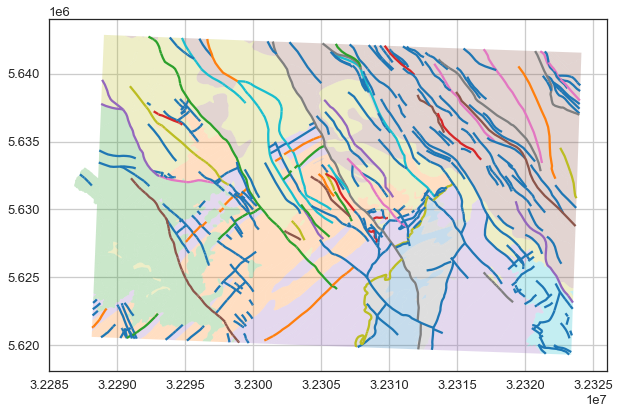

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
faults.plot(ax=ax, aspect='equal', column='NAME')
interfaces.plot(ax=ax, aspect='equal', column = 'SYSTEM1', alpha = 0.25)
plt.grid()

## Convert Polygons to LineStrings

In order for `GemGIS` to work with the layer data, the Polygons need to be transformed into `LineStrings`. The boundaries of the polygons consist of `LineStrings` and `MultiLineStrings`. A dedicated function to convert a `GeoDataFrame` containing `Polygons` into `LineStrings` and `MultiLineStrings` is also part of `GemGIS`.

In [6]:
interfaces_ls = gg.vector.polygons_to_linestrings(interfaces)
print(len(interfaces_ls))
interfaces_ls.head()

848


,geometry
0,"LINESTRING (32299083.709 5631034.983, 32299164..."
1,"LINESTRING (32317556.700 5633860.692, 32317497..."
2,"LINESTRING (32310428.554 5638385.230, 32310400..."
3,"MULTILINESTRING ((32291096.918 5622295.519, 32..."
4,"LINESTRING (32307344.796 5625848.944, 32307389..."


## Remove Vertices from Fault Traces

Vertices can easily be removed substracting the `LineStrings` from each other.


In [50]:
vertices_out, vertices_in = gg.vector.remove_vertices_from_faults(faults.loc[782].geometry, interfaces_ls.loc[198].geometry)

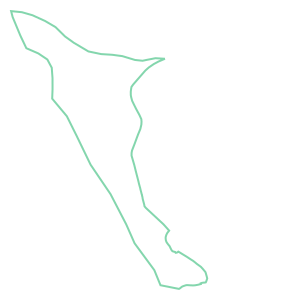

In [53]:
interfaces_ls.loc[198].geometry

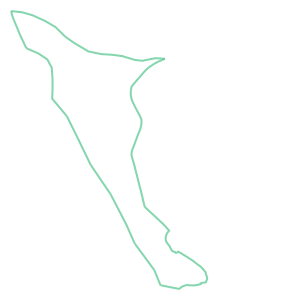

In [52]:
vertices_out

In [42]:
list(vertices_out.geoms)

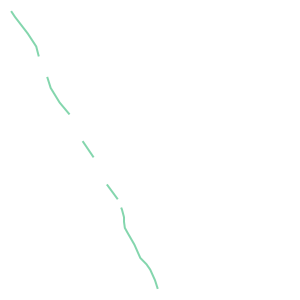

In [60]:
faults.loc[782].geometry-interfaces.loc[198].geometry

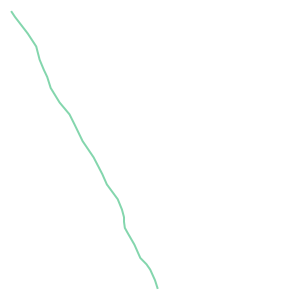

In [54]:
faults.loc[782].geometry

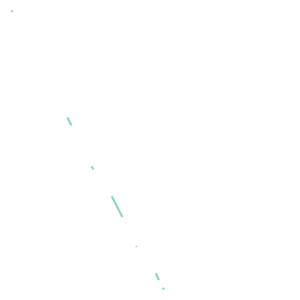

In [25]:
vertices_in

In [57]:
contained = filter(interfaces_ls.loc[198].geometry.contains, [faults.loc[782].geometry])
contained 

In [58]:
[p.wkt for p in contained]

[]